<a href="https://www.kaggle.com/code/abdulrahmanmahmoud/titanic-predictions?scriptVersionId=182925115" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction
    Titanic Survival Predictions (Beginner)¶
    I am a new to data analysis and machine learning. Please  upvoting if it waas useful to you! 

## Import Necessary Libraries
    First off, we need to import several Python libraries such as numpy, pandas, matplotlib , seaborn and sklearn for ML

In [131]:
# analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# machine learning 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn import naive_bayes

In [132]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

# E.D.A

## dataset test 

In [133]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [134]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [135]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [136]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Dataset Train

In [137]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [138]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [139]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [140]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## analysis

In [141]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

In [142]:
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [143]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

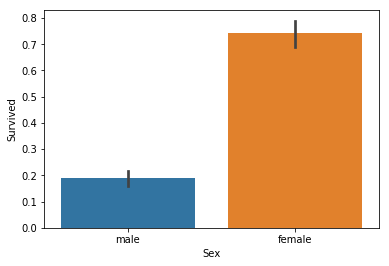

In [144]:
sns.barplot(x="Sex", y="Survived", data=train)


As predicted, females have a much higher chance of survival than males.

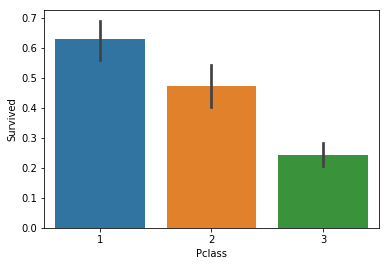

In [145]:
sns.barplot(x="Pclass", y="Survived", data=train)

People with higher S class had a higher rate of survival

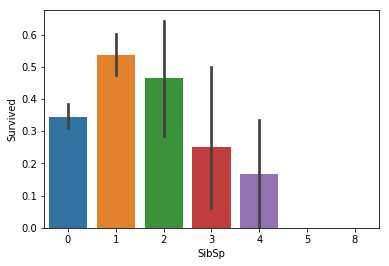

In [146]:
sns.barplot(x="SibSp", y="Survived", data=train)

people with more siblings or spouses aboard were less likely to survive.

# ML 

In [147]:
feature = ['Sex','SibSp','Parch','Pclass']
y = train['Survived']
x = train.drop(['Survived', 'PassengerId'], axis=1)
x = pd.get_dummies(train[feature])
xTrain,xTest,yTrain,yTest = train_test_split(x,y,random_state=0, test_size= 0.22)


## ML Models

## Using RandomForestClassifier

In [148]:
# Using RandomForestClassifier
re = RandomForestClassifier(n_estimators=100 ,max_depth=10 ,random_state=1)
re.fit(xTrain,yTrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [149]:
predictRE =  re.predict(xTest)
scoreRE = round(accuracy_score(predictRE, yTest) * 100, 2)
scoreRE

80.2

## Using DecisionTreeClassifier

In [150]:
dt = DecisionTreeClassifier(random_state=1,max_depth=10 )
dt.fit(xTrain,yTrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [151]:
predictDT=dt.predict(xTest)
scoreDT = round(accuracy_score(predictDT, yTest) * 100, 2)
scoreDT

80.2

## Using Support vector Machine

In [152]:
clf =svm.SVC(kernel='poly', gamma=1)
clf.fit(xTrain,yTrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [153]:
predictclf=clf.predict(xTest)
scoreclf = round(accuracy_score(predictclf, yTest) * 100, 2)
scoreclf

81.22

## Using Naive Bayes

In [154]:
nb =naive_bayes.GaussianNB()
nb.fit(xTrain,yTrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [155]:
predictnb=nb.predict(xTest)
scorenb = round(accuracy_score(predictclf, yTest) * 100, 2)
scorenb

81.22

we see that SVM  and Naive Bayes have a higher scores

# Creating Submission File

In [156]:
feature = ['Sex','SibSp','Parch','Pclass']
test_features = pd.get_dummies(test[feature])
submission_predictions = clf.predict(test_features)
submission_df = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': submission_predictions})
submission_df.to_csv('submission.csv', index=False)

In [157]:
sub = pd.read_csv('submission.csv')
sub.shape

(418, 2)